In [1]:
import pandas as pd
import matplotlib.pyplot as plt #for plotting till we use TA-Lib
import datetime as dt

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
tcs_ns = pd.read_csv("data/TCS.NS.csv")

In [5]:
tcs_ns.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,04-04-2013,1540.099976,1540.099976,1501.000000,1507.800049,1383.489258,563169.0,NaN,NaN,NaN
1,05-04-2013,1505.000000,1509.349976,1484.099976,1498.349976,1374.818481,932624.0,NaN,NaN,NaN
2,08-04-2013,1498.900024,1498.900024,1475.000000,1480.750000,1358.669434,448208.0,NaN,NaN,NaN
3,09-04-2013,1480.000000,1513.000000,1477.599976,1497.400024,1373.946655,836177.0,NaN,NaN,NaN
4,10-04-2013,1509.900024,1538.900024,1501.000000,1530.449951,1404.271729,1023142.0,NaN,NaN,NaN


In [6]:
tcs_ns["date_x"] = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in tcs_ns["Date"]]

In [7]:
tcs_ns["30d"] = np.round(tcs_ns["Close"].rolling(window = 30, center = False).mean(), 2)
tcs_ns["40d"] = np.round(tcs_ns["Close"].rolling(window = 40, center = False).mean(), 2)
tcs_ns["50d"] = np.round(tcs_ns["Close"].rolling(window = 50, center = False).mean(), 2)

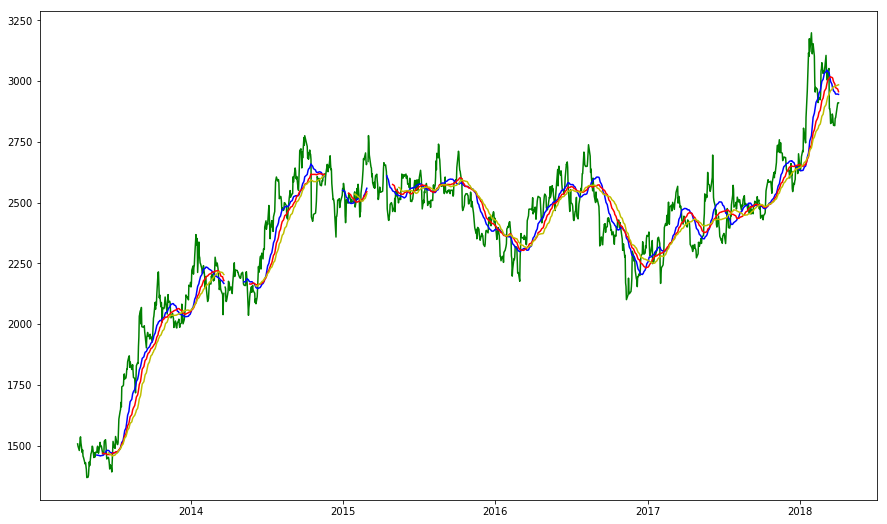

In [9]:
pylab.rcParams['figure.figsize'] = (15, 9)
plt.plot_date(tcs_ns["date_x"],tcs_ns["Close"],'g-')
plt.plot_date(tcs_ns["date_x"],tcs_ns["30d"],'b-')
plt.plot_date(tcs_ns["date_x"],tcs_ns["40d"],'r-')
plt.plot_date(tcs_ns["date_x"],tcs_ns["50d"],'y-')

In [10]:
tcs_ns["ewma_30"] = pd.DataFrame(data=tcs_ns["Close"].ewm(span=30,adjust=False).mean())
tcs_ns["ewma_40"] = pd.DataFrame(data=tcs_ns["Close"].ewm(span=40,adjust=False).mean())
tcs_ns["ewma_50"] = pd.DataFrame(data=tcs_ns["Close"].ewm(span=50,adjust=False).mean())

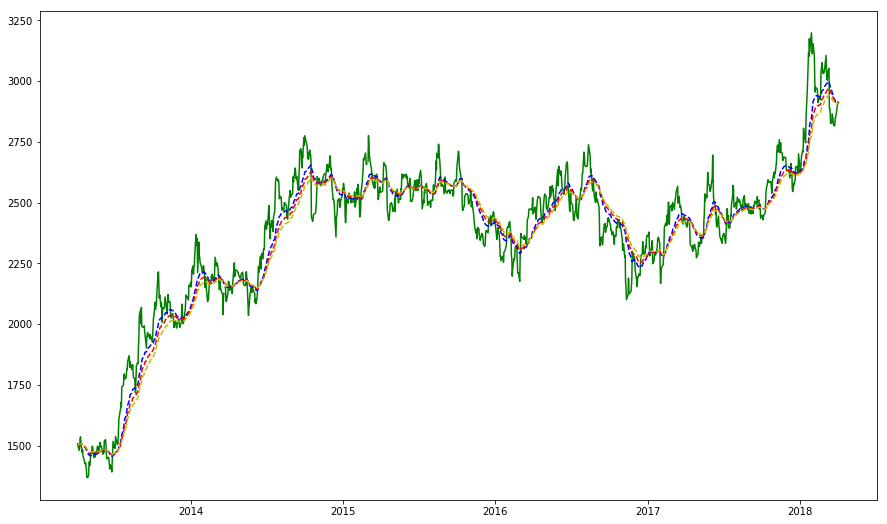

In [11]:
plt.plot_date(tcs_ns["date_x"],tcs_ns["Close"],'g-')
plt.plot_date(tcs_ns["date_x"],tcs_ns["ewma_30"],'b--')
plt.plot_date(tcs_ns["date_x"],tcs_ns["ewma_40"],'r--')
plt.plot_date(tcs_ns["date_x"],tcs_ns["ewma_50"],'y--')

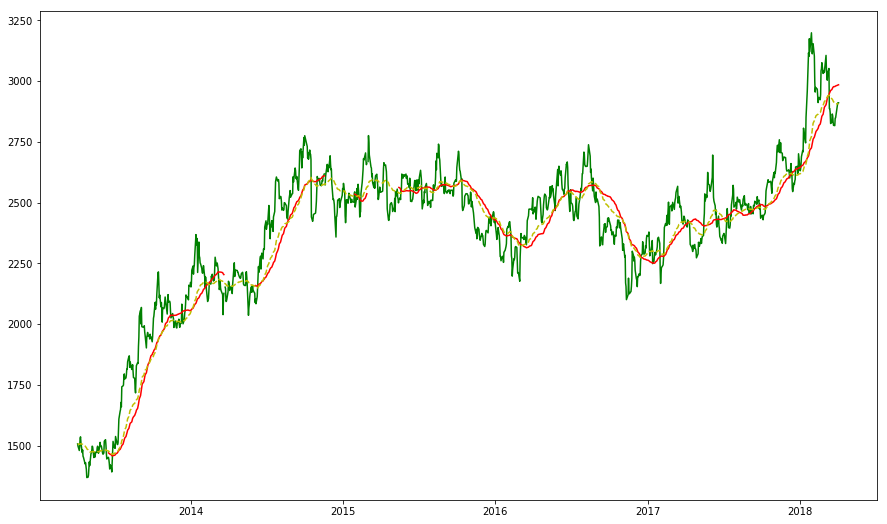

In [12]:
plt.plot_date(tcs_ns["date_x"],tcs_ns["Close"],'g-')
plt.plot_date(tcs_ns["date_x"],tcs_ns["50d"],'r-')
plt.plot_date(tcs_ns["date_x"],tcs_ns["ewma_50"],'y--')